In [ ]:
!pip install pymatgen > None

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import pandas as pd
import numpy as np
import re # Регулярки
from math import gcd, isclose
import sympy as sp # Библиотека символьных вычеслений, мат.задачи

In [ ]:
df = pd.read_csv(r'/content/Megy_fast_copy.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2143 non-null   int64  
 1   area/volume        2143 non-null   float64
 2   volume             2143 non-null   float64
 3   area               2143 non-null   float64
 4   space_group_core   2143 non-null   int64  
 5   space_group_shell  2143 non-null   int64  
 6   Tc                 2143 non-null   float64
 7   x                  2143 non-null   float64
 8   y                  2143 non-null   float64
 9   z                  2143 non-null   float64
 10  shape              2143 non-null   int64  
 11  temperature_k      2143 non-null   float64
 12  h_range_max_koe    2143 non-null   float64
 13  sat_em_g           2143 non-null   float64
 14  coer_oe            2143 non-null   float64
 15  mr (emu/g)         2143 non-null   float64
 16  id                 2143 

In [ ]:
df

,Unnamed: 0,area/volume,volume,area,space_group_core,space_group_shell,h_range_max_koe,Tb,TN,Tc,...,exc_dir,ver_shift_emu_g,ver_s_dir,fc_field_t,id,sphericity,max/min,core,shell,formula
0,0,0.405405,1697.396888,688.133874,186,227,50.0,300.0,378.0,793.0,...,0.0,0.00000,1.0,5.0,<built-in function id>,1.0,1.0,ZnO,CoFe2O4,ZnO/CoFe2O4
1,1,0.428571,1436.753827,615.751640,225,227,50.0,276.0,293.0,843.0,...,0.0,0.00000,1.0,5.0,<built-in function id>,1.0,1.0,CoO,CoFe2O4,CoO/CoFe2O4
2,2,0.176471,20579.508890,3631.678040,227,0,10.0,150.0,766.8,640.0,...,1.0,0.00000,1.0,0.0,<built-in function id>,1.0,1.0,Mn0.5Zn0.5Fe2O4,0,Mn0.5Zn0.5Fe2O4
3,3,0.272727,5575.275053,1520.529560,227,0,10.0,150.0,766.8,640.0,...,1.0,0.00000,1.0,0.0,<built-in function id>,1.0,1.0,Mn0.5Zn0.5Fe2O4,0,Mn0.5Zn0.5Fe2O4
4,4,0.250000,7238.223360,1809.555840,227,0,10.0,150.0,766.8,640.0,...,1.0,0.00000,1.0,0.0,<built-in function id>,1.0,1.0,Mn0.5Zn0.5Fe2O4,0,Mn0.5Zn0.5Fe2O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1293,0.158061,28640.254100,4526.910553,161,0,70.0,200.0,640.0,1103.0,...,0.0,2.10662,1.0,7.0,<built-in function id>,1.0,1.0,BiFeO3,NaN,BiFeO3-SG
1294,1294,0.235479,8661.568143,2039.615732,161,0,70.0,200.0,640.0,1103.0,...,0.0,0.03832,1.0,7.0,<built-in function id>,1.0,1.0,BiFeO3,NaN,BiFeO3-SG
1295,1295,0.060000,523598.333300,31415.900000,15,225,30.0,75.0,490.0,720.0,...,0.0,0.08100,1.0,0.3,<built-in function id>,1.0,1.0,NiCo2O4,NiO,NiCo2O4/NiO
1296,1296,0.060000,523598.333300,31415.900000,15,225,30.0,75.0,490.0,720.0,...,0.0,0.65000,1.0,0.3,<built-in function id>,1.0,1.0,NiCo2O4,NiO,NiCo2O4/NiO


# найти углы и длины решёток

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.composition import Composition

# Ваш API ключ
api_key = "dS2WjhWZea9vufDmKOGHiJOfOhbIZ4B9"

# Формулы материалов
materials = ["Fe3O4", "MnO"]

# Инициализация MPRester с использованием вашего API ключа
with MPRester(api_key) as m:
    for material in materials:
        # Получение структурных данных для материала
        entries = m.get_entries(material, inc_structure="final")

        # Фильтрация, чтобы выбрать наиболее компактную структуру
        min_atoms = float('inf')
        best_entry = None
        for entry in entries:
            num_atoms = len(entry.structure)
            if num_atoms < min_atoms:
                min_atoms = num_atoms
                best_entry = entry

        # Вывод информации о наиболее компактной структуре материала
        if best_entry:
            composition = Composition(best_entry.structure.composition.reduced_formula)
            print(f"Material: {material}")
            print(f"Composition: {composition}")
            print(f"Structure: {best_entry.structure}")
            print()
        else:
            print(f"No suitable structure found for material: {material}")

        print("-------------------------")

Material: Fe3O4
Composition: Fe3 O4
Structure: Full Formula (Fe3 O4)
Reduced Formula: Fe3O4
abc   :   3.058813   5.142692   5.225573
angles:  74.876335  90.000000  90.000000
pbc   :       True       True       True
Sites (7)
  #  SP      a         b         c    magmom
---  ----  ---  --------  --------  --------
  0  Fe    0    0         0            3.811
  1  Fe    0    0.5       0.5          4.355
  2  Fe    0.5  0         0.5          4.315
  3  O     0    0.212548  0.281523     0.306
  4  O     0.5  0.736901  0.276114     0.302
  5  O     0    0.787452  0.718477     0.306
  6  O     0.5  0.263099  0.723886     0.302

-------------------------
Material: MnO
Composition: Mn1 O1
Structure: Full Formula (Mn1 O1)
Reduced Formula: MnO
abc   :   3.471527   3.471527   4.807558
angles:  90.036991  89.963009 120.093071
pbc   :       True       True       True
Sites (2)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Mn    0.666513  0

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.composition import Composition
import pandas as pd

# Ваш API ключ
api_key = "dS2WjhWZea9vufDmKOGHiJOfOhbIZ4B9"

def get_integer_formula(material):
    try:
        comp = Composition(material)
        integer_formula, factor = comp.get_integer_formula_and_factor()
        return integer_formula
    except ValueError as e:
        print(f"Error processing formula {material}: {e}")
        return None

def get_reduced_formula(material):
    try:
        comp = Composition(material)
        reduced_formula, factor = comp.get_reduced_formula_and_factor()
        return reduced_formula
    except ValueError as e:
        print(f"Error processing formula {material}: {e}")
        return None

# Преобразование формул в core и shell
df["core"] = df["core"].apply(lambda x: get_reduced_formula(get_integer_formula(x)) if pd.notna(x) and x not in ["0", "", " "] else x)
df["shell"] = df["shell"].apply(lambda x: get_reduced_formula(get_integer_formula(x)) if pd.notna(x) and x not in ["0", "", " "] else x)

# Инициализация MPRester с использованием вашего API ключа
with MPRester(api_key) as m:
    def get_lattice_params(material):
        if pd.isna(material) or material in ["0", "", " "]:
            return None, None, None, None, None, None
        try:
            # Получение структурных данных для материала
            entries = m.get_entries(material, inc_structure="final")

            # Фильтрация, чтобы выбрать наиболее компактную структуру
            min_atoms = float('inf')
            best_entry = None
            for entry in entries:
                num_atoms = len(entry.structure)
                if num_atoms < min_atoms:
                    min_atoms = num_atoms
                    best_entry = entry

            # Извлечение параметров решетки и углов
            if best_entry:
                lattice = best_entry.structure.lattice
                a, b, c = lattice.a, lattice.b, lattice.c
                alpha, beta, gamma = lattice.alpha, lattice.beta, lattice.gamma
                return a, b, c, alpha, beta, gamma
            else:
                return None, None, None, None, None, None
        except Exception as e:
            print(f"Error retrieving data for material {material}: {e}")
            return None, None, None, None, None, None

    # Создание столбцов для хранения параметров решетки и углов
    df["core_a"], df["core_b"], df["core_c"] = None, None, None
    df["core_alpha"], df["core_beta"], df["core_gamma"] = None, None, None
    df["shell_a"], df["shell_b"], df["shell_c"] = None, None, None
    df["shell_alpha"], df["shell_beta"], df["shell_gamma"] = None, None, None

    # Извлечение и сохранение параметров для каждого материала в core и shell
    for index, row in df.iterrows():
        core = row["core"]
        shell = row["shell"]

        core_params = get_lattice_params(core)
        shell_params = get_lattice_params(shell)

        if core_params:
            df.at[index, "core_a"], df.at[index, "core_b"], df.at[index, "core_c"] = core_params[:3]
            df.at[index, "core_alpha"], df.at[index, "core_beta"], df.at[index, "core_gamma"] = core_params[3:]

        if shell_params and shell not in ["0", "", " "]:
            df.at[index, "shell_a"], df.at[index, "shell_b"], df.at[index, "shell_c"] = shell_params[:3]
            df.at[index, "shell_alpha"], df.at[index, "shell_beta"], df.at[index, "shell_gamma"] = shell_params[3:]

print(df)

      Unnamed: 0  area/volume        volume         area  space_group_core  \
0              0     0.405405   1697.396888   688.133874               186   
1              1     0.428571   1436.753827   615.751640               225   
2              2     0.176471  20579.508890  3631.678040               227   
3              3     0.272727   5575.275053  1520.529560               227   
4              4     0.250000   7238.223360  1809.555840               227   
...          ...          ...           ...          ...               ...   
2138        2138     1.500000     33.510293    50.265440               227   
2139        2139     1.500000     33.510293    50.265440               227   
2140        2140     1.200000     65.449792    78.539750               227   
2141        2141     1.200000     65.449792    78.539750               227   
2142        2142     0.545455    696.909382   380.132390               227   

      space_group_shell     Tc     x     y     z  ...    core_c

# Ищем магнитные ионы

In [ ]:
# Задаем ионы, которые считаются магнитными
magnetic_ions = ["Fe", "Co", "Ni", "Mn", "Cr", "V", "Zn", "Nd", "Sm", "Dy", "Gd", "Ru", "Ti", "Cu", "Ag", "La"]

def count_ions(formula):
    if pd.isna(formula) or formula in ["0", "", " ", None]:
        return 0, 0
    # Создаем объект Composition для данной формулы
    try:
        composition = Composition(formula)
        total_ions = sum(composition[el] for el in composition)
        magnetic_ions_count = sum(composition[el] for el in composition if el.symbol in magnetic_ions)
    except ValueError:
        total_ions, magnetic_ions_count = 0, 0
    return total_ions, magnetic_ions_count

# Функция для вычисления суммы всех ионов и суммы магнитных ионов для каждой строки
def calculate_ions(row):
    core_total_ions, core_magnetic_ions = count_ions(row["core"])
    shell_total_ions, shell_magnetic_ions = count_ions(row["shell"])
    total_ions = core_total_ions + shell_total_ions
    magnetic_ions = core_magnetic_ions + shell_magnetic_ions
    return pd.Series({
        "total_ions": total_ions,
        "z_ions": magnetic_ions,
        "core_total_ions": core_total_ions,
        "core_magnetic_ions": core_magnetic_ions,
        "shell_total_ions": shell_total_ions,
        "shell_magnetic_ions": shell_magnetic_ions
    })

In [ ]:
# Применяем функцию к каждой строке и сохраняем результат в новые столбцы
df[["total_ions", "z_ions", "core_total_ions", "core_magnetic_ions", "shell_total_ions", "shell_magnetic_ions"]] = df.apply(calculate_ions, axis=1)

print(df)

      Unnamed: 0  area/volume        volume         area  space_group_core  \
0              0     0.405405   1697.396888   688.133874               186   
1              1     0.428571   1436.753827   615.751640               225   
2              2     0.176471  20579.508890  3631.678040               227   
3              3     0.272727   5575.275053  1520.529560               227   
4              4     0.250000   7238.223360  1809.555840               227   
...          ...          ...           ...          ...               ...   
2138        2138     1.500000     33.510293    50.265440               227   
2139        2139     1.500000     33.510293    50.265440               227   
2140        2140     1.200000     65.449792    78.539750               227   
2141        2141     1.200000     65.449792    78.539750               227   
2142        2142     0.545455    696.909382   380.132390               227   

      space_group_shell     Tc     x     y     z  ...    core_c

In [ ]:
print(df['total_ions'], df['core'], df['shell'])

0        9.0
1        9.0
2       14.0
3       14.0
4       14.0
        ... 
2138     7.0
2139     7.0
2140     7.0
2141     7.0
2142     7.0
Name: total_ions, Length: 2143, dtype: float64 0               ZnO
1               CoO
2       MnZn(FeO2)4
3       MnZn(FeO2)4
4       MnZn(FeO2)4
           ...     
2138      Zn(FeO2)2
2139      Zn(FeO2)2
2140      Zn(FeO2)2
2141      Zn(FeO2)2
2142      Zn(FeO2)2
Name: core, Length: 2143, dtype: object 0       Fe2CoO4
1       Fe2CoO4
2             0
3             0
4             0
         ...   
2138          0
2139          0
2140          0
2141          0
2142          0
Name: shell, Length: 2143, dtype: object


In [ ]:
# из магнитного pymatgena - number of magnetic ions и тогда можно посчитать n_magnetic/n_all
# Создаем колонку num_of_magn_imons как отношение z_ions к total_ions
df["num_of_magn_ions"] = df.apply(lambda row: row["z_ions"] / row["total_ions"] if row["total_ions"] != 0 else float('nan'), axis=1)

print(df["num_of_magn_ions"].unique())

[0.44444444 0.42857143 0.4        0.66666667 0.28571429 0.2
 0.33333333 0.5        0.25       0.375      1.         0.38461538
 0.22       0.356      0.03846154 0.07407407 0.37       0.334
 0.41666667 0.8        0.57142857 0.71428571 0.6875     0.64705882
 0.6        0.69565217 0.1875     0.3        0.41428571 0.38571429
 0.37142857 0.35714286 0.43262411 0.37888199 0.33701657 0.30348259
 0.39714286 0.32142857 0.88888889 0.34375    0.3125     0.28125
 0.359375   0.84444444 0.86222222 0.75       0.55555556 0.82
 0.52       0.597      0.621      0.672      0.558      0.55
 0.54       0.58       0.47826087 0.45454545 0.48148148 0.48717949
 0.37037037 0.4137931  0.1        0.21923077 0.20769231 0.19615385
 0.4375     0.36       0.52941176        nan 0.36363636 0.23076923
 0.21052632 0.54545455 0.14285714 0.42748092 0.35416667 0.35789474
 0.71126761 0.79245283]


# (Tn-Tb)/Tn

In [ ]:
# создадим новый столбец
df['Tn-Tb/Tn'] = (df['TN'] - df['Tb']) / df['TN']
print(df['Tn-Tb/Tn'].unique())
df

[ 0.20634921  0.05802048  0.80438185  0.95945946  0.94095238  0.14858841
  0.74157303  0.94556765  0.83981337  0.33447099  0.92702703  0.92351275
 -1.19047619  0.85687023  0.89678899  0.88396624 -0.33        0.99043977
  0.86247086  0.63693467  0.67946667  0.68373333  0.9066874   0.89830508
  0.77056962  0.80221519  0.78691983  0.7406639   0.74502805  0.55280899
  0.59699087  0.53416149  0.60722702  0.61899924  0.61646638  0.61568025
  0.64209019 -0.96969697 -0.66666667  0.86565421 -0.15223881  0.72590012
  0.67609113  0.51340206 -0.25        0.90316757  0.90600605  0.90694006
  0.96503497  0.84714434  0.94140625  0.53546099 -0.32423208  0.71982759
  0.67916667  0.77989418  0.74874372  0.83645879 -3.25       -4.21
 -2.81        0.76744186  0.38566553  0.24914676  0.35153584  0.26962457
  0.78835979  0.29328622  0.18500407  0.91071429  0.72826087  0.68421053
  0.97326733  0.68592965  0.82935154  0.16382253  0.36919431  0.58447717
  0.4151671  -0.42857143 -0.22866894  0.99047619  0.68965

,common_spin_core,Unnamed: 0,area/volume,volume,area,space_group_core,space_group_shell,h_range_max_koe,Tb,TN,...,shell_beta,shell_gamma,total_ions,z_ions,core_total_ions,core_magnetic_ions,shell_total_ions,shell_magnetic_ions,num_of_magn_ions,Tn-Tb/Tn
0,0,0,0.405405,1697.396888,688.133874,186,227,50.0,300.0,378.0,...,120.20238,89.397475,9.0,4.0,2.0,1.0,7.0,3.0,0.444444,0.206349
1,0,1,0.428571,1436.753827,615.751640,225,227,50.0,276.0,293.0,...,120.20238,89.397475,9.0,4.0,2.0,1.0,7.0,3.0,0.444444,0.058020
2,0,2,0.176471,20579.508890,3631.678040,227,0,10.0,150.0,766.8,...,None,None,14.0,6.0,14.0,6.0,0.0,0.0,0.428571,0.804382
3,0,3,0.272727,5575.275053,1520.529560,227,0,10.0,150.0,766.8,...,None,None,14.0,6.0,14.0,6.0,0.0,0.0,0.428571,0.804382
4,0,4,0.250000,7238.223360,1809.555840,227,0,10.0,150.0,766.8,...,None,None,14.0,6.0,14.0,6.0,0.0,0.0,0.428571,0.804382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,1293,0.158061,28640.254100,4526.910553,161,0,70.0,200.0,640.0,...,None,None,5.0,1.0,5.0,1.0,0.0,0.0,0.200000,0.687500
1294,0,1294,0.235479,8661.568143,2039.615732,161,0,70.0,200.0,640.0,...,None,None,5.0,1.0,5.0,1.0,0.0,0.0,0.200000,0.687500
1295,0,1295,0.060000,523598.333300,31415.900000,15,225,30.0,75.0,490.0,...,90.0,119.999985,9.0,4.0,7.0,3.0,2.0,1.0,0.444444,0.846939
1296,0,1296,0.060000,523598.333300,31415.900000,15,225,30.0,75.0,490.0,...,90.0,119.999985,9.0,4.0,7.0,3.0,2.0,1.0,0.444444,0.846939


# Aex= (3*Tc)/(2*z*a)
a = lattice constant
z = number of magnetic ions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2143 non-null   int64  
 1   area/volume          2143 non-null   float64
 2   volume               2143 non-null   float64
 3   area                 2143 non-null   float64
 4   space_group_core     2143 non-null   int64  
 5   space_group_shell    2143 non-null   int64  
 6   Tc                   2143 non-null   float64
 7   x                    2143 non-null   float64
 8   y                    2143 non-null   float64
 9   z                    2143 non-null   float64
 10  shape                2143 non-null   int64  
 11  temperature_k        2143 non-null   float64
 12  h_range_max_koe      2143 non-null   float64
 13  sat_em_g             2143 non-null   float64
 14  coer_oe              2143 non-null   float64
 15  mr (emu/g)           2143 non-null   f

In [ ]:
df.columns

Index(['Unnamed: 0', 'area/volume', 'volume', 'area', 'space_group_core',
       'space_group_shell', 'Tc', 'x', 'y', 'z', 'shape', 'temperature_k',
       'h_range_max_koe', 'sat_em_g', 'coer_oe', 'mr (emu/g)', 'id',
       'sphericity', 'max/min', 'core', 'shell', 'total_ions', 'z_ions',
       'core_total_ions', 'core_magnetic_ions', 'shell_total_ions',
       'shell_magnetic_ions', 'num_of_magn_ions', 'core_a', 'core_b', 'core_c',
       'core_alpha', 'core_beta', 'core_gamma', 'shell_a', 'shell_b',
       'shell_c', 'shell_alpha', 'shell_beta', 'shell_gamma', 'Aex'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Столбцы, которые будут заполнены KNN
target_columns = ['core_a', 'core_b', 'core_c', 'core_alpha', 'core_beta', 'core_gamma', 'shell_a']

# Столбцы, которые будут использоваться для заполнения пропусков
feature_columns = [
    'area/volume', 'volume', 'area', 'Tc', 'x', 'y', 'z', 'temperature_k',
    'h_range_max_koe', 'sat_em_g', 'coer_oe', 'mr (emu/g)',
    'sphericity', 'max/min', 'total_ions', 'z_ions',
    'core_total_ions', 'core_magnetic_ions', 'shell_total_ions',
    'shell_magnetic_ions', 'num_of_magn_ions'
] + target_columns

# Извлечение данных только по нужным столбцам
df_subset = df[feature_columns].copy()

# Масштабирование данных (если необходимо)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=feature_columns)

# Применение KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Количество соседей можно настроить
df_scaled[target_columns] = imputer.fit_transform(df_scaled[target_columns])

# Обратное масштабирование (если применяли масштабирование)
df_filled = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=feature_columns)

# Вставляем заполненные значения обратно в оригинальный DataFrame
df[target_columns] = df_filled[target_columns]

print(df[target_columns].head())

     core_a    core_b    core_c  core_alpha  core_beta  core_gamma   shell_a
0  3.274224  3.274224  3.274224   60.000000  60.000000   60.000000  5.960108
1  3.024080  3.011828  5.316193  107.294951  89.502583  120.037844  5.960108
2  6.056519  6.056519  6.056519   90.000000  60.000000  120.000000  3.948765
3  6.056519  6.056519  6.056519   90.000000  60.000000  120.000000  3.948765
4  6.056519  6.056519  6.056519   90.000000  60.000000  120.000000  3.948765


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2143 non-null   int64  
 1   area/volume          2143 non-null   float64
 2   volume               2143 non-null   float64
 3   area                 2143 non-null   float64
 4   space_group_core     2143 non-null   int64  
 5   space_group_shell    2143 non-null   int64  
 6   Tc                   2143 non-null   float64
 7   x                    2143 non-null   float64
 8   y                    2143 non-null   float64
 9   z                    2143 non-null   float64
 10  shape                2143 non-null   int64  
 11  temperature_k        2143 non-null   float64
 12  h_range_max_koe      2143 non-null   float64
 13  sat_em_g             2143 non-null   float64
 14  coer_oe              2143 non-null   float64
 15  mr (emu/g)           2143 non-null   f

In [ ]:
#df['Tc'] = df['Tc'].fillna(0)
#df['shell_a'] = df['shell_a'].fillna(0)

# Функция для вычисления Aex
def calculate_Aex(row):
    try:
        Tc = float(row["Tc"])  # Приведение к float
        z_ions = float(row["z_ions"])  # Приведение к float
        shell_a = float(row["shell_a"])  # Приведение к float
        core_a = float(row["core_a"])  # Приведение к float

        if z_ions != 0:
            if shell_a != 0:
                Aex = (3 * Tc) / (2 * z_ions * (shell_a + core_a))
            else:
                Aex = (3 * Tc) / (2 * z_ions * core_a)
        else:
            Aex = np.nan  # Если z_ions равно нулю
    except (ValueError, TypeError):
        Aex = np.nan  # На случай непредвиденных ошибок
    return Aex

# Создаем столбец Aex
df["Aex"] = df.apply(calculate_Aex, axis=1)

print(df)

      Unnamed: 0  area/volume        volume         area  space_group_core  \
0              0     0.405405   1697.396888   688.133874               186   
1              1     0.428571   1436.753827   615.751640               225   
2              2     0.176471  20579.508890  3631.678040               227   
3              3     0.272727   5575.275053  1520.529560               227   
4              4     0.250000   7238.223360  1809.555840               227   
...          ...          ...           ...          ...               ...   
2138        2138     1.500000     33.510293    50.265440               227   
2139        2139     1.500000     33.510293    50.265440               227   
2140        2140     1.200000     65.449792    78.539750               227   
2141        2141     1.200000     65.449792    78.539750               227   
2142        2142     0.545455    696.909382   380.132390               227   

      space_group_shell     Tc     x     y     z  ...  core_alp

# Проверим на пропуски

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
area/volume,0
volume,0
area,0
space_group_core,0
space_group_shell,0
Tc,0
x,0
y,0
z,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2143 non-null   int64  
 1   area/volume          2143 non-null   float64
 2   volume               2143 non-null   float64
 3   area                 2143 non-null   float64
 4   space_group_core     2143 non-null   int64  
 5   space_group_shell    2143 non-null   int64  
 6   Tc                   2143 non-null   float64
 7   x                    2143 non-null   float64
 8   y                    2143 non-null   float64
 9   z                    2143 non-null   float64
 10  shape                2143 non-null   int64  
 11  temperature_k        2143 non-null   float64
 12  h_range_max_koe      2143 non-null   float64
 13  sat_em_g             2143 non-null   float64
 14  coer_oe              2143 non-null   float64
 15  mr (emu/g)           2143 non-null   f

In [ ]:
# Выгрузим данные отдельный датасет
df.to_csv(r'MEGY_copy_new_param_13.csv')

In [ ]:
id = df['Unnamed: 0']

In [ ]:
df.columns

Index(['Unnamed: 0', 'area/volume', 'volume', 'area', 'space_group_core',
       'space_group_shell', 'Tc', 'x', 'y', 'z', 'shape', 'temperature_k',
       'h_range_max_koe', 'sat_em_g', 'coer_oe', 'mr (emu/g)', 'sphericity',
       'max/min', 'core', 'shell', 'total_ions', 'z_ions', 'core_total_ions',
       'core_magnetic_ions', 'shell_total_ions', 'shell_magnetic_ions',
       'num_of_magn_ions', 'core_a', 'core_b', 'core_c', 'core_alpha',
       'core_beta', 'core_gamma', 'shell_a', 'shell_b', 'shell_c',
       'shell_alpha', 'shell_beta', 'shell_gamma', 'Aex'],
      dtype='object')

In [ ]:
# List of columns to convert to float
columns_to_convert = ['core_a', 'core_b', 'core_c', 'core_alpha', 'core_beta', 'core_gamma',
                      'shell_b', 'shell_c', 'shell_alpha', 'shell_beta', 'shell_gamma']

In [ ]:
# Convert specified columns to float
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [ ]:
df = df.drop(columns=['id'])#, 'core',  'shell', 'formula'])
#df = df.drop(columns=['Unnamed: 0.1', 'core',  'shell', 'formula']) # ,

заполнение пропусков

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Столбцы, которые будут заполнены KNN
target_columns = ['Aex']

# Столбцы, которые будут использоваться для заполнения пропусков
feature_columns = [
    'area/volume', 'volume', 'area', 'Tc', 'x', 'y', 'z', 'temperature_k',
    'h_range_max_koe', 'sat_em_g', 'coer_oe', 'mr (emu/g)',
    'sphericity', 'max/min', 'total_ions', 'z_ions',
    'core_total_ions', 'core_magnetic_ions', 'shell_total_ions',
    'shell_magnetic_ions', 'num_of_magn_ions'
] + target_columns

# Извлечение данных только по нужным столбцам
df_subset = df[feature_columns].copy()

# Масштабирование данных (если необходимо)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=feature_columns)

# Применение KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Количество соседей можно настроить
df_scaled[target_columns] = imputer.fit_transform(df_scaled[target_columns])

# Обратное масштабирование (если применяли масштабирование)
df_filled = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=feature_columns)

# Вставляем заполненные значения обратно в оригинальный DataFrame
df[target_columns] = df_filled[target_columns]

print(df[target_columns].head())

         Aex
0  35.330114
1  35.479001
2   9.919758
3   9.919758
4   9.919758


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
area/volume,0
volume,0
area,0
space_group_core,0
space_group_shell,0
Tc,0
x,0
y,0
z,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2143 non-null   int64  
 1   area/volume          2143 non-null   float64
 2   volume               2143 non-null   float64
 3   area                 2143 non-null   float64
 4   space_group_core     2143 non-null   int64  
 5   space_group_shell    2143 non-null   int64  
 6   Tc                   2143 non-null   float64
 7   x                    2143 non-null   float64
 8   y                    2143 non-null   float64
 9   z                    2143 non-null   float64
 10  shape                2143 non-null   int64  
 11  temperature_k        2143 non-null   float64
 12  h_range_max_koe      2143 non-null   float64
 13  sat_em_g             2143 non-null   float64
 14  coer_oe              2143 non-null   float64
 15  mr (emu/g)           2143 non-null   f

# ЭТО должно быть в фичах

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

In [ ]:
df.columns

In [ ]:
df = df.drop(columns=['Unnamed: 0'])  #'shape', 'sphericity', , 'volume', 'area', 'x', 'y', 'z'
#'core', 'shell', 'formula', 'Unnamed: 0.1',

In [ ]:
df = df.drop(columns=['total_ions', 'z_ions', 'core_total_ions',
                      'core_magnetic_ions', 'shell_total_ions', 'shell_magnetic_ions'])

In [ ]:
df['core_c/a'] = (df['core_c'] / df['core_a'])
df['shell_c/a'] = (df['shell_c'] / df['shell_a'])

In [ ]:
df = df.drop(columns=['core_a', 'core_c', 'shell_a', 'shell_c'])

In [ ]:
df = df.drop(columns=['shape', 'space_group_core', 'space_group_shell',])

In [ ]:
#df = df.drop(columns=['Tb', 'TN'])

In [ ]:
df = df.drop(columns=['core', 'shell']) #, 'formula'

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
area/volume,0
volume,0
area,0
Tc,0
x,0
y,0
z,0
temperature_k,0
h_range_max_koe,0


In [ ]:
#df = df.drop(columns=['shell_c/a'])

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['Unnamed: 0', 'area/volume', 'volume', 'area', 'Tc', 'x', 'y', 'z',
       'temperature_k', 'h_range_max_koe', 'sat_em_g', 'coer_oe', 'mr (emu/g)',
       'sphericity', 'max/min', 'num_of_magn_ions', 'core_b', 'core_alpha',
       'core_beta', 'core_gamma', 'shell_b', 'shell_alpha', 'shell_beta',
       'shell_gamma', 'Aex', 'core_c/a', 'shell_c/a'],
      dtype='object')

In [ ]:
df = df.drop(columns=['volume', 'area', 'x', 'y', 'z'])

In [ ]:
df = df.drop(columns=[])

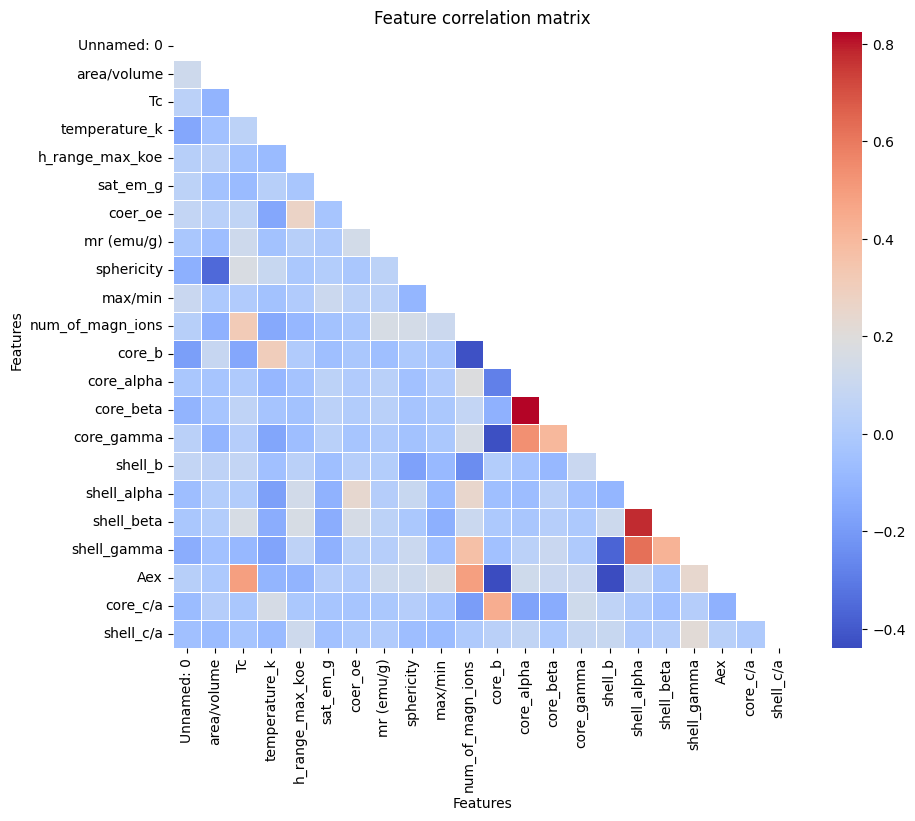

In [ ]:
correlation_matrix = df.corr()

# Создаем маску для верхней половины матрицы
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
# Строим heatmap с маской для верхней половины матрицы и без аннотаций
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.7)
plt.title('Feature correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2143 non-null   int64  
 1   area/volume       2143 non-null   float64
 2   Tc                2143 non-null   float64
 3   temperature_k     2143 non-null   float64
 4   h_range_max_koe   2143 non-null   float64
 5   sat_em_g          2143 non-null   float64
 6   coer_oe           2143 non-null   float64
 7   mr (emu/g)        2143 non-null   float64
 8   sphericity        2143 non-null   float64
 9   max/min           2143 non-null   float64
 10  num_of_magn_ions  2141 non-null   float64
 11  core_b            2143 non-null   float64
 12  core_alpha        2143 non-null   float64
 13  core_beta         2143 non-null   float64
 14  core_gamma        2143 non-null   float64
 15  shell_b           930 non-null    float64
 16  shell_alpha       930 non-null    float64


In [ ]:
df = df.drop(columns=['core_total_ions', 'core_magnetic_ions', 'total_ions', 'z_ions',
       'shell_total_ions', 'shell_magnetic_ions', 'num_of_magn_imons', 'Elements', 'Stoichiometry'])

In [ ]:
# Выгрузим данные отдельный датасет
df.to_csv(r'MEGY_copy_new_param_13_new.csv')